# Carregando os dados e as libs

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from math import floor
from pandas.plotting import scatter_matrix

#importando o arquivo
df = pd.read_csv('score_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,5.883.287.671.232.870,3.106.849.315.068.490,1,0,0,0,2.0,False
1,2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,5.235.616.438.356.160,835.890.410.958.904,1,0,1,1,1.0,False
2,3,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,5.235.616.438.356.160,835.890.410.958.904,1,0,1,1,1.0,False
3,4,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224.657.534.246.500,2.106.849.315.068.490,1,1,1,1,2.0,False
4,5,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,2.923.013.698.630.130,3.021.917.808.219.170,1,0,0,0,2.0,False


# Pré-processamento: Eliminação de atributos irrelevantes

In [4]:
# Remove a coluna id
df = df.drop(columns=['id'])

# Imprime o dataframe
display(df.head(n=10))

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,5.883.287.671.232.870,3.106.849.315.068.490,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,5.235.616.438.356.160,835.890.410.958.904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,5.235.616.438.356.160,835.890.410.958.904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224.657.534.246.500,2.106.849.315.068.490,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,2.923.013.698.630.130,3.021.917.808.219.170,1,0,0,0,2.0,False
5,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,2.923.013.698.630.130,3.021.917.808.219.170,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,2.748.219.178.082.190,4.024.657.534.246.570,1,0,1,0,2.0,False
7,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,2.748.219.178.082.190,4.024.657.534.246.570,1,0,1,0,2.0,False
8,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,3.004.931.506.849.310,4.438.356.164.383.560,1,0,0,0,2.0,False
9,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,3.004.931.506.849.310,4.438.356.164.383.560,1,0,0,0,2.0,False


In [5]:
# Exibindo as informações do DF antes das transformações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16649 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16649 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16649 non-null  object 
 8   idade                  16650 non-null  object 
 9   tempo_emprego          16650 non-null  object 
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

# Pré-processamento: Tratamento de atributos com valores ausentes e inconsistentes

In [6]:
# Índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()

# Imprime apenas as linhas com valoes ausentes
display(df.iloc[idxRowNan])

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
16626,NaN,N,N,0,Working,Secondary / secondary special,Widow,House / apartment,4.352.876.712.328.760,136.986.301.369.863,1,1,1,0,1.0,True
16628,F,N,N,0,NaN,Secondary / secondary special,Married,House / apartment,582.027.397.260.274,-10.006.657.534.246.500,1,0,0,0,2.0,True
16635,M,Y,Y,0,State servant,Higher education,Married,NaN,27.646.575.342.465.700,17.616.438.356.164.300,1,0,0,0,2.0,True


In [7]:
def trataFaltantes(df):
    '''
    Substitui valores faltantes pela média dos outros valores do mesmo atributo
    de amostras que sejam da mesma classe.
    Também substitui valores nulos das colunas sexo, tipo_renda e tipo_residencia pela moda.
    '''
    for col in ['sexo', 'tipo_renda', 'tipo_residencia']:
        if col in df.columns:
            moda = df[col].mode()[0]   # pega a moda
            df[col].fillna(moda, inplace=True)

    return df

# imprime apenas as linhas que antes possuiam valores NaN
trataFaltantes(df)
print('\nAmostras que possuiam valores faltantes:')
display(df.iloc[idxRowNan])


Amostras que possuiam valores faltantes:


/tmp/ipython-input-3592697901.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
16626,F,N,N,0,Working,Secondary / secondary special,Widow,House / apartment,4.352.876.712.328.760,136.986.301.369.863,1,1,1,0,1.0,True
16628,F,N,N,0,Working,Secondary / secondary special,Married,House / apartment,582.027.397.260.274,-10.006.657.534.246.500,1,0,0,0,2.0,True
16635,M,Y,Y,0,State servant,Higher education,Married,House / apartment,27.646.575.342.465.700,17.616.438.356.164.300,1,0,0,0,2.0,True


# Pré-processamento: Tratamento de dados sem sentido ou redundantes

In [10]:
df_duplicates = df[ df.duplicated(keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,5.235.616.438.356.160,835.890.410.958.904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,5.235.616.438.356.160,835.890.410.958.904,1,0,1,1,1.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,2.923.013.698.630.130,3.021.917.808.219.170,1,0,0,0,2.0,False
5,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,2.923.013.698.630.130,3.021.917.808.219.170,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,2.748.219.178.082.190,4.024.657.534.246.570,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,M,N,N,1,Working,Secondary / secondary special,Married,House / apartment,29.194.520.547.945.200,2.536.986.301.369.860,1,1,1,0,3.0,True
16641,M,Y,N,0,Working,Incomplete higher,Married,With parents,24.997.260.273.972.600,26.301.369.863.013.600,1,1,0,0,2.0,True
16642,M,Y,N,0,Working,Incomplete higher,Married,With parents,24.997.260.273.972.600,26.301.369.863.013.600,1,1,0,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005.479.452.054.700,9.8,1,1,0,0,2.0,True


In [11]:
def delDuplicatas(df):
   '''
   Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
   '''

   # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
   df = df.drop_duplicates(keep = 'first')

   return df

df = delDuplicatas(df)

display(df)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,5.883.287.671.232.870,3.106.849.315.068.490,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,5.235.616.438.356.160,835.890.410.958.904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224.657.534.246.500,2.106.849.315.068.490,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,2.923.013.698.630.130,3.021.917.808.219.170,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,2.748.219.178.082.190,4.024.657.534.246.570,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,3.485.753.424.657.530,31.013.698.630.136.900,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,5.410.958.904.109.580,9.884.931.506.849.310,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,4.338.904.109.589.040,7.380.821.917.808.210,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005.479.452.054.700,9.8,1,1,0,0,2.0,True


In [12]:
# para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores
# dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
df_duplicates = df[ df.duplicated(keep=False)]

# se tiver valores inconsistentes, imprime
if len(df_duplicates)>0:
   print('\nAmostras inconsistentes:')
   display(df_duplicates)
else:
   print('Não existem mostras inconsistentes')


Não existem mostras inconsistentes


In [13]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes)

,qtd_filhos,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
count,6770.000000,6770.0,6770.000000,6770.000000,6770.000000,6770.000000
mean,0.427917,1.0,0.221713,0.297489,0.083456,2.197194
std,0.751551,0.0,0.415430,0.457187,0.276591,0.917465
min,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,14.000000,1.0,1.000000,1.000000,1.000000,15.000000


# Pré-processamento: normalização dos atributos

In [14]:
def normalizar(X):
    """
    Normaliza X.
    - Se X for um DataFrame: normaliza apenas colunas numéricas e retorna (df_normalizado, mu, sigma, cols_numeric)
    - Se X for ndarray: normaliza todas as colunas e retorna (X_norm, mu, sigma)
    """
    if isinstance(X, pd.DataFrame):
        cols_numeric = X.select_dtypes(include=[np.number]).columns
        if len(cols_numeric) == 0:
            raise ValueError("Nenhuma coluna numérica encontrada para normalizar.")

        X_num = X[cols_numeric].astype(float).copy()
        mu = X_num.mean(axis=0)
        sigma = X_num.std(axis=0, ddof=1)
        sigma_replaced = sigma.replace(0, 1)
        X_norm = X.copy()
        X_norm[cols_numeric] = (X_num - mu) / sigma_replaced

        return X_norm, mu, sigma_replaced, list(cols_numeric)

    else:
        X_arr = np.asarray(X, dtype=float)
        m, n = X_arr.shape
        mu = np.mean(X_arr, axis=0)
        sigma = np.std(X_arr, axis=0, ddof=1)
        sigma[sigma == 0] = 1
        X_norm = (X_arr - mu) / sigma
        return X_norm, mu, sigma

features = df.iloc[:, 0:-1]
target = df.iloc[:, -1]

features_norm, mu, sigma, cols_numeric = normalizar(features)

df_norm = pd.concat([features_norm, target.reset_index(drop=True)], axis=1)

df.iloc[:, 0:-1] = features_norm

numeric_cols = features.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) >= 2:
    before_0 = features[numeric_cols[0]].iloc[0]
    before_1 = features[numeric_cols[1]].iloc[0]
    after_0 = features_norm[numeric_cols[0]].iloc[0]
    after_1 = features_norm[numeric_cols[1]].iloc[0]
    print('\nPrimeira amostra (antes): [%2.4f %2.4f].' % (before_0, before_1))
    print('Primeira amostra (após normalização): [%2.4f %2.4f].' % (after_0, after_1))
else:
    print("Não há ao menos 2 colunas numéricas para mostrar.")



Primeira amostra (antes): [0.0000 1.0000].
Primeira amostra (após normalização): [-0.5694 0.0000].


/tmp/ipython-input-2320132031.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       -0.569379
1       -0.569379
3       -0.569379
4       -0.569379
6       -0.569379
           ...   
16644    0.761203
16645   -0.569379
16646   -0.569379
16647   -0.569379
16649   -0.569379
Name: qtd_filhos, Length: 6770, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0:-1] = features_norm
/tmp/ipython-input-2320132031.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.0
1        0.0
3        0.0
4        0.0
6        0.0
        ... 
16644    0.0
16645    0.0
16646    0.0
16647    0.0
16649    0.0
Name: possui_celular, Length: 6770, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0:-1] = features_norm
/tmp/

In [15]:
df_detalhes = df.describe()

display(df_detalhes.round(8))

,qtd_filhos,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
count,6770.000000,6770.0,6770.000000,6770.000000,6770.000000,6770.000000
mean,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
std,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
min,-0.569379,0.0,-0.533696,-0.650694,-0.301732,-1.304893
25%,-0.569379,0.0,-0.533696,-0.650694,-0.301732,-0.214933
50%,-0.569379,0.0,-0.533696,-0.650694,-0.301732,-0.214933
75%,0.761203,0.0,-0.533696,1.536594,-0.301732,0.875027
max,18.058772,0.0,1.873448,1.536594,3.313711,13.954551


# Pré-processamento: Detecção de *outliers*

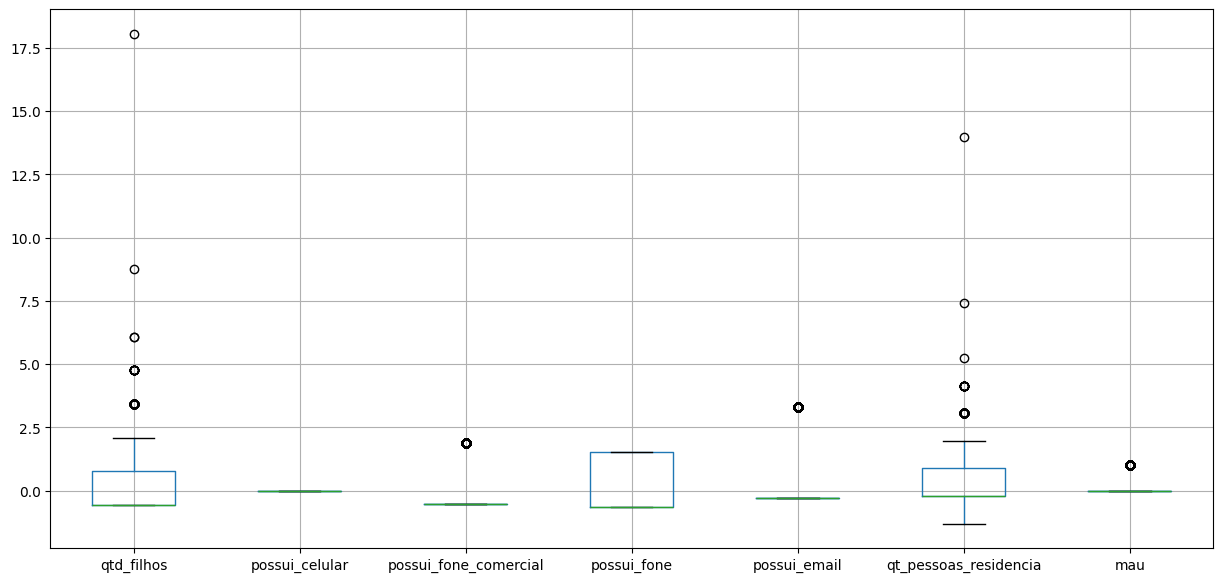

In [16]:
# gera um bloxplot para cada atributo
df.boxplot(figsize=(15,7))
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


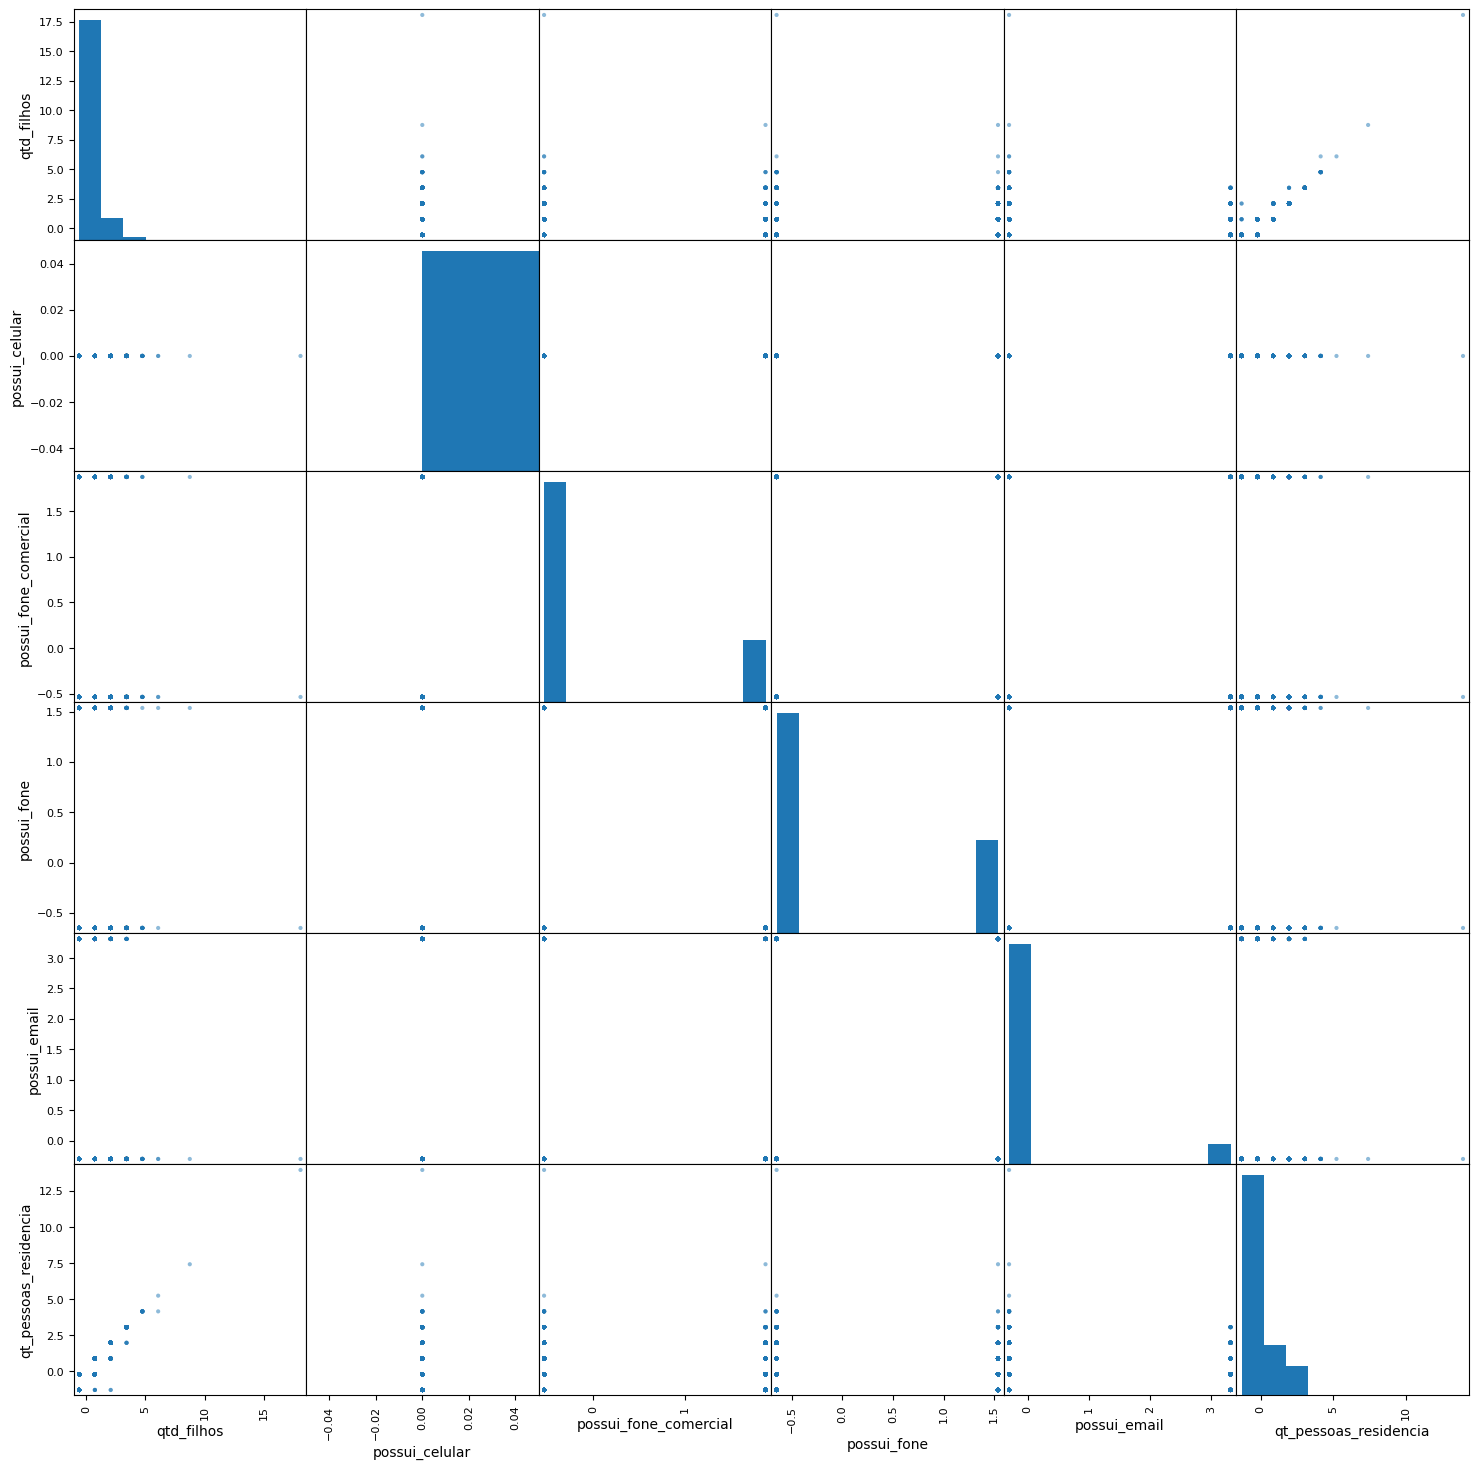

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

pd.plotting.scatter_matrix(numeric_df, figsize=(18,18))
plt.show()

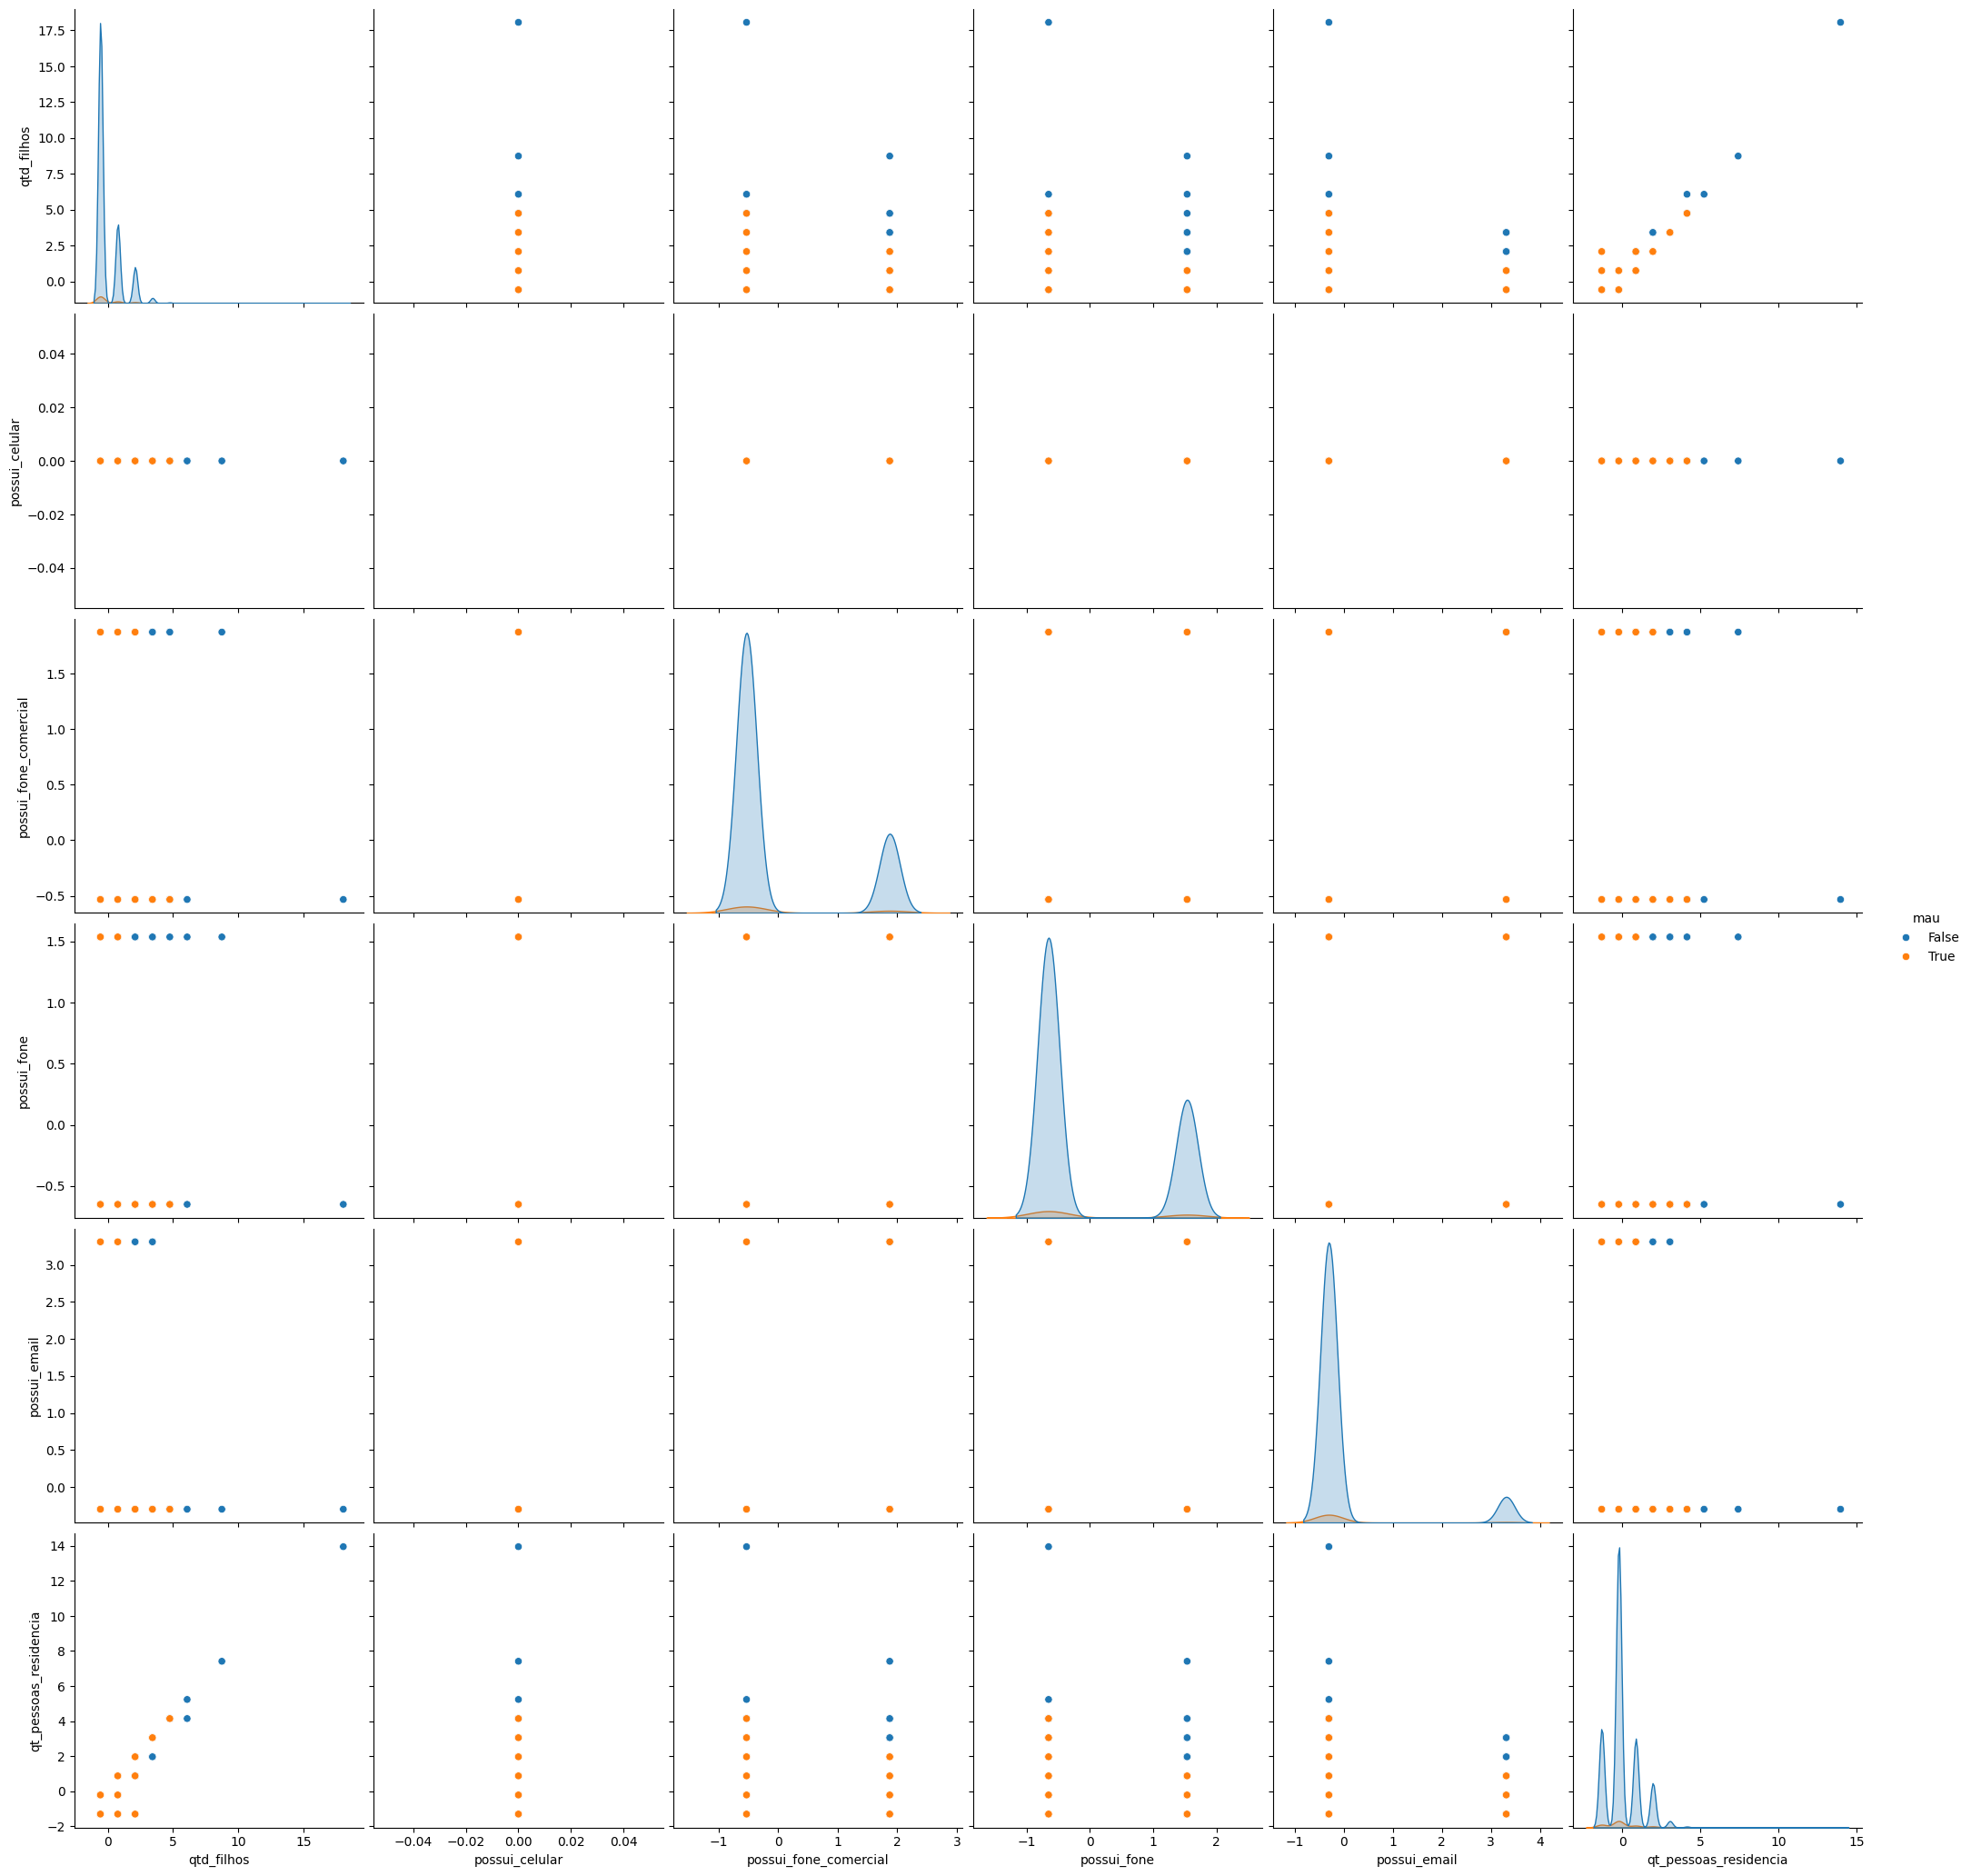

In [18]:
# matriz de gráficos scatter
sns.pairplot(df, hue='mau', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()


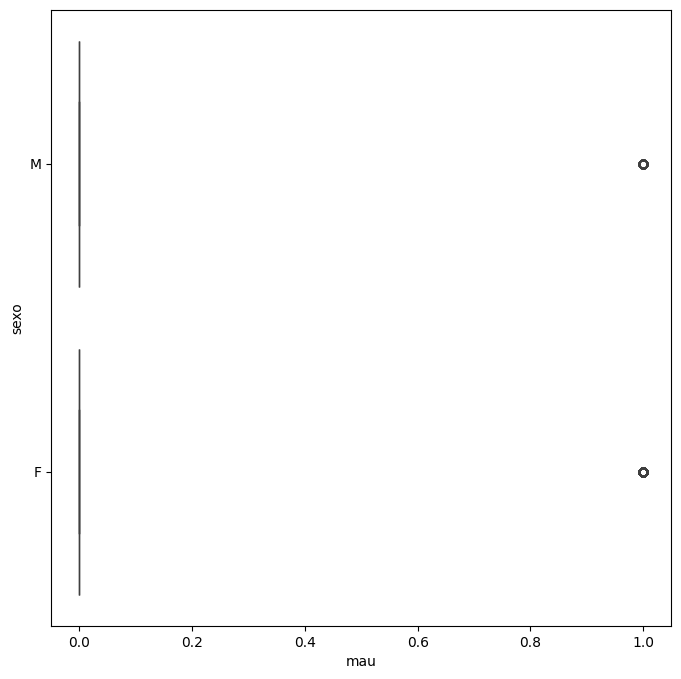

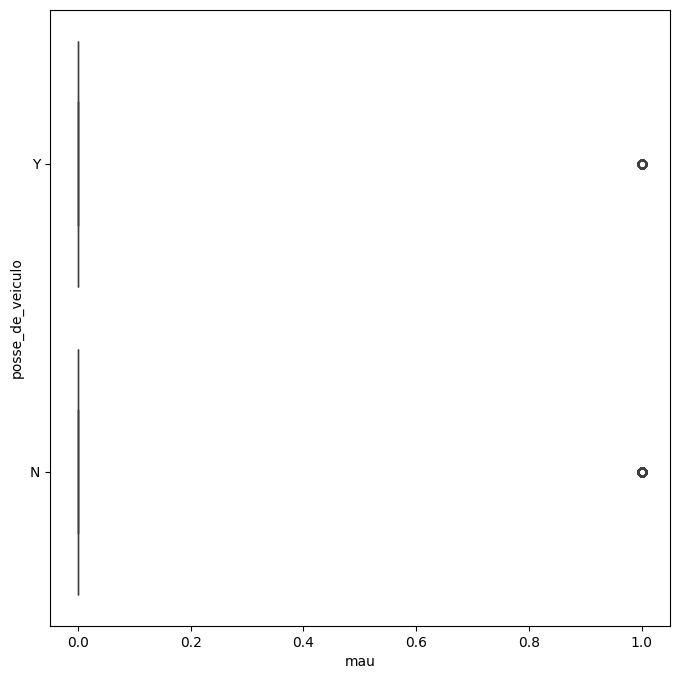

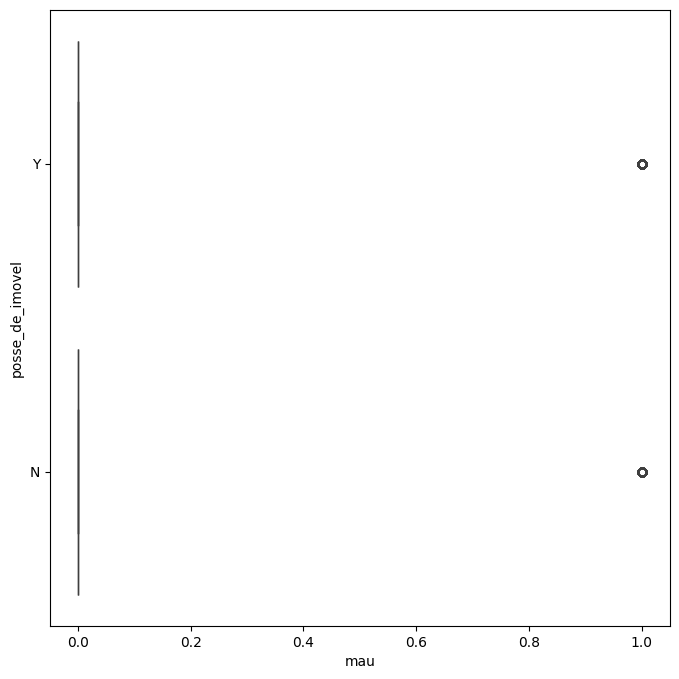

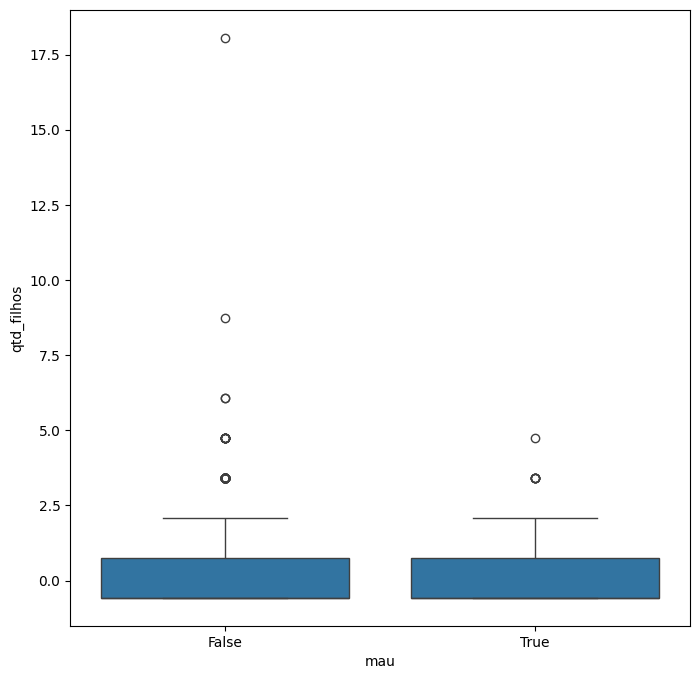

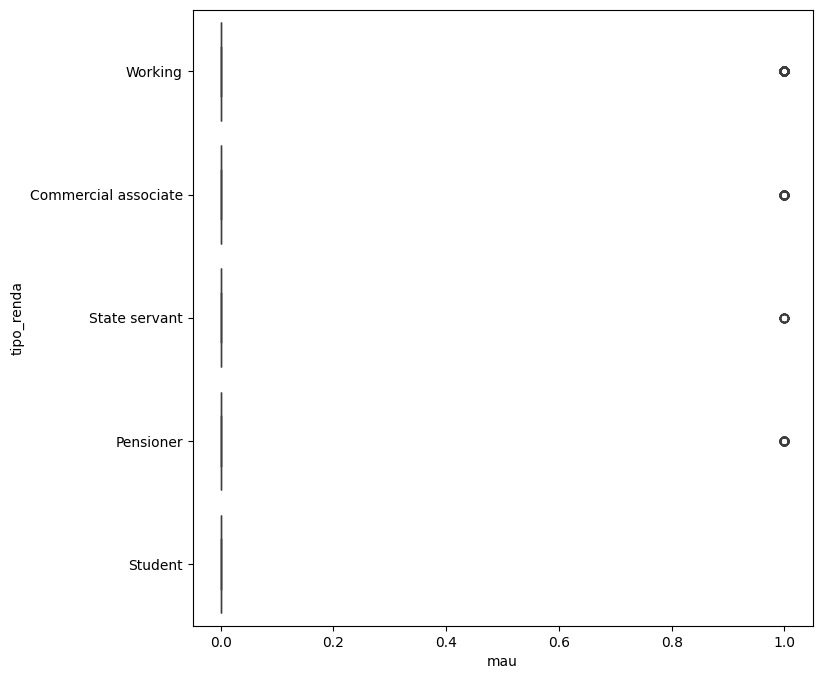

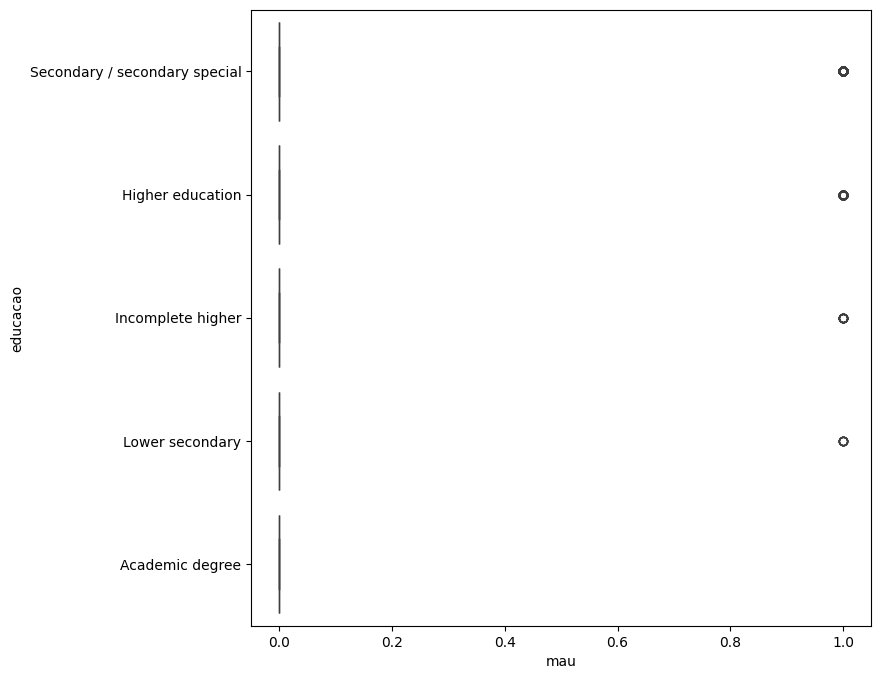

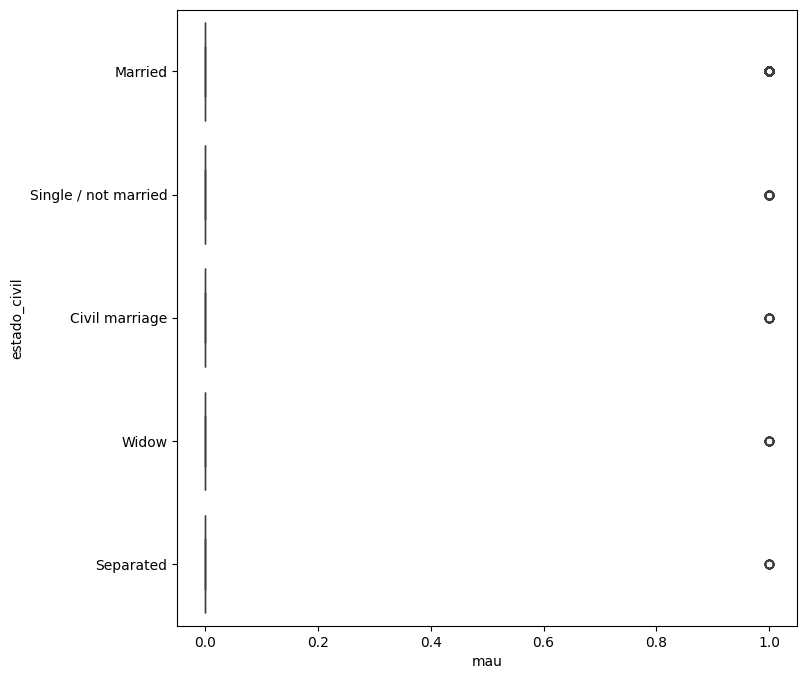

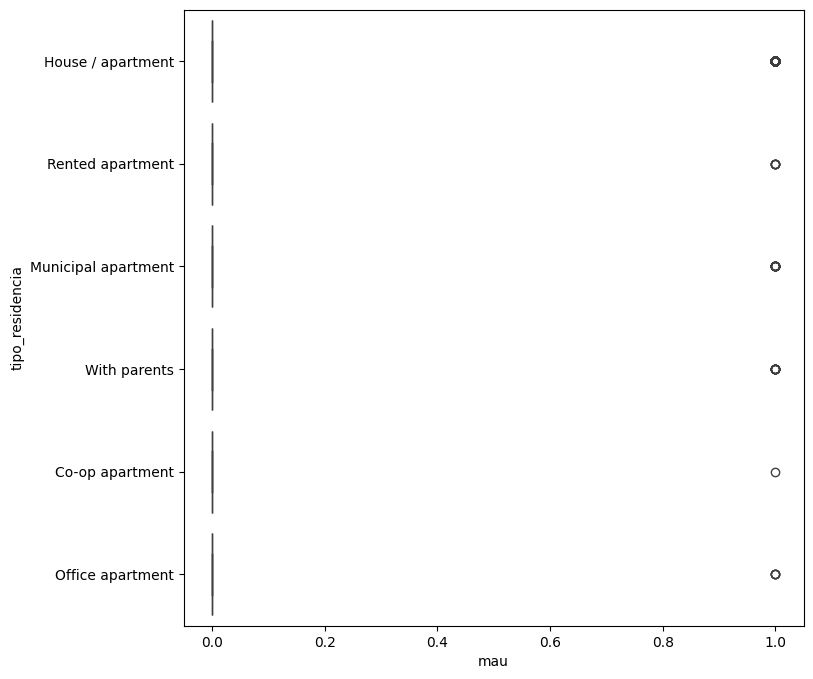

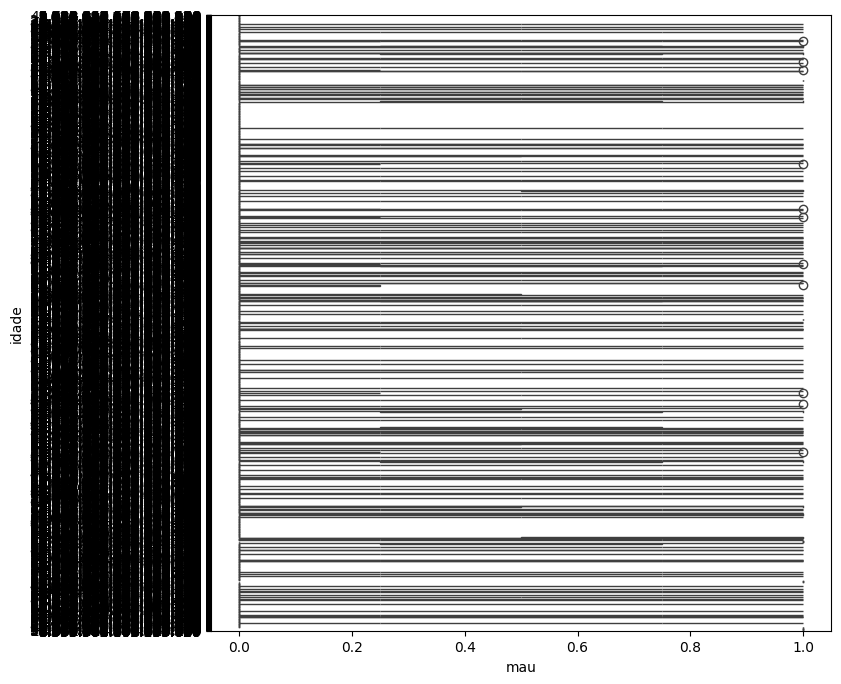

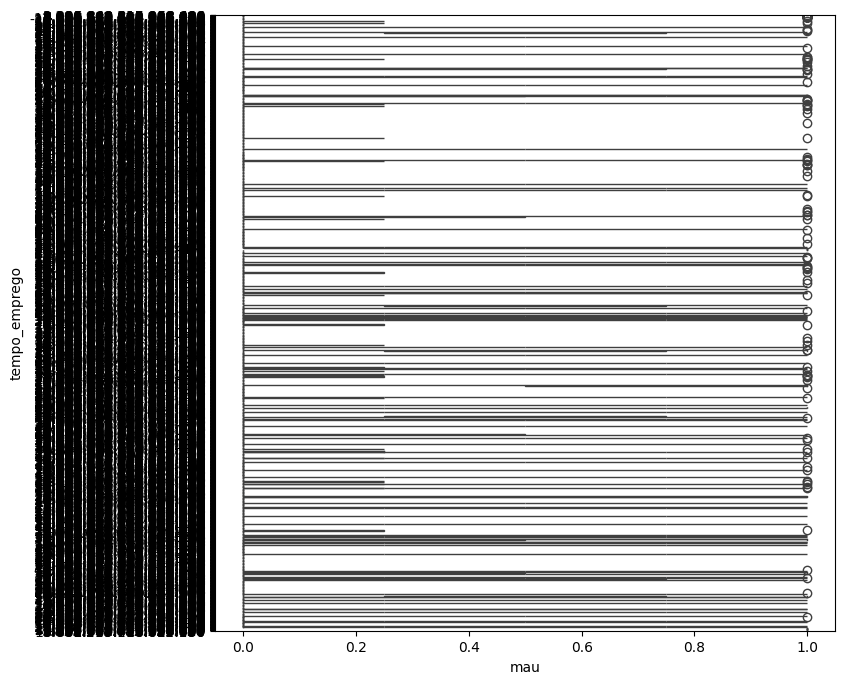

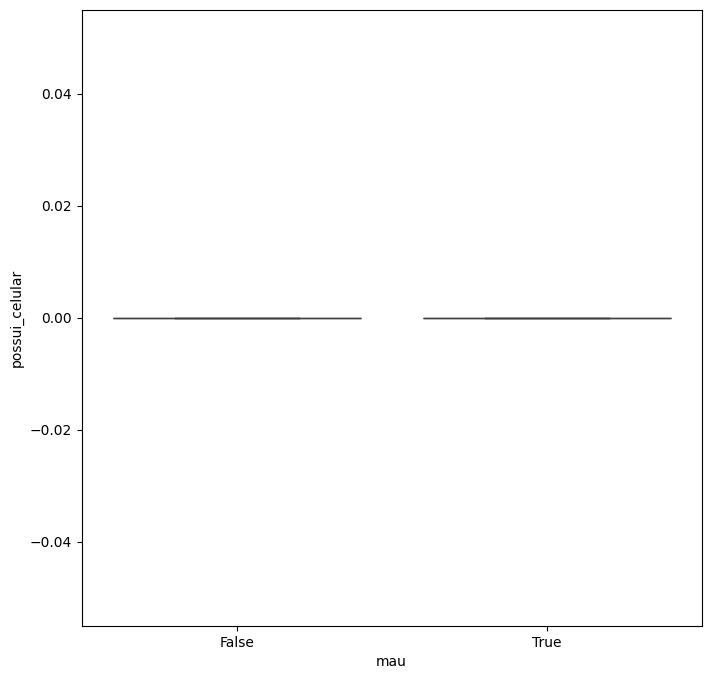

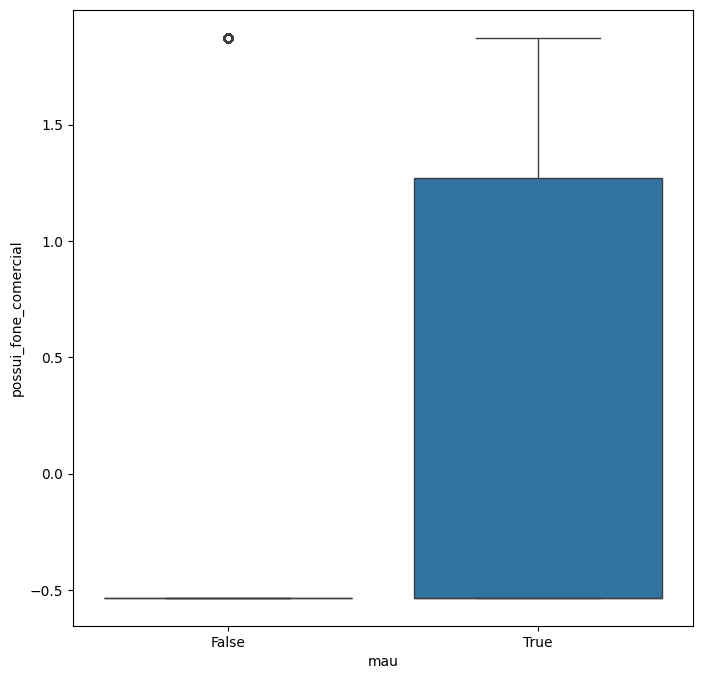

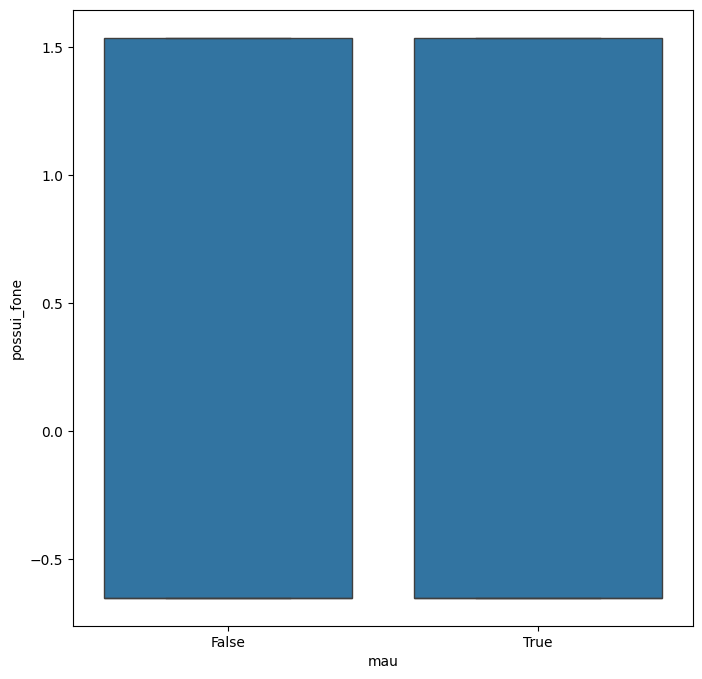

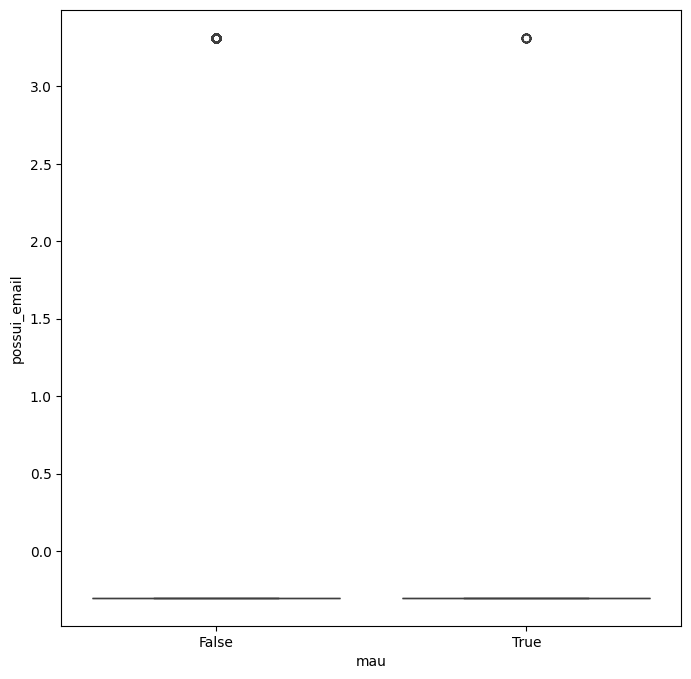

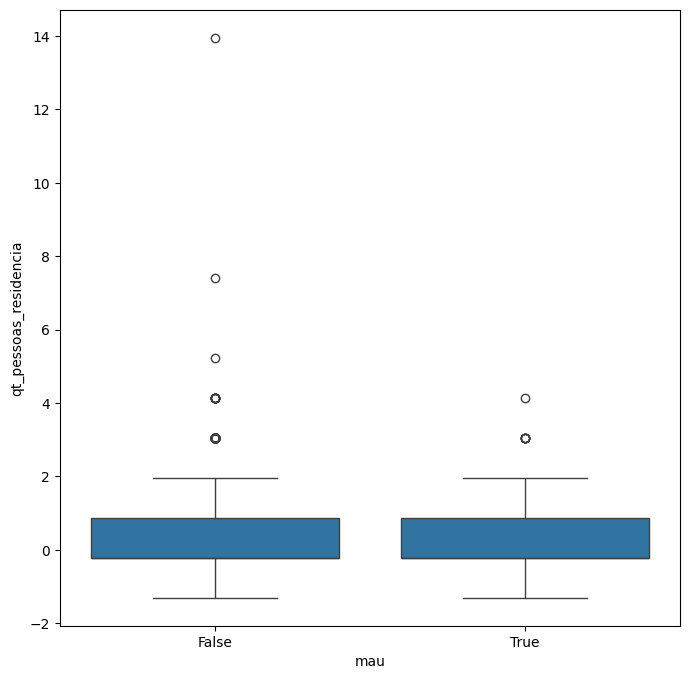

In [19]:
for atributo in df.columns[:-1]:
   # define a dimensão do gráfico
   plt.figure(figsize=(8,8))

   # cria o boxplot
   sns.boxplot(x="mau", y=atributo, data=df, whis=1.5)

   # mostra o gráfico
   plt.show()


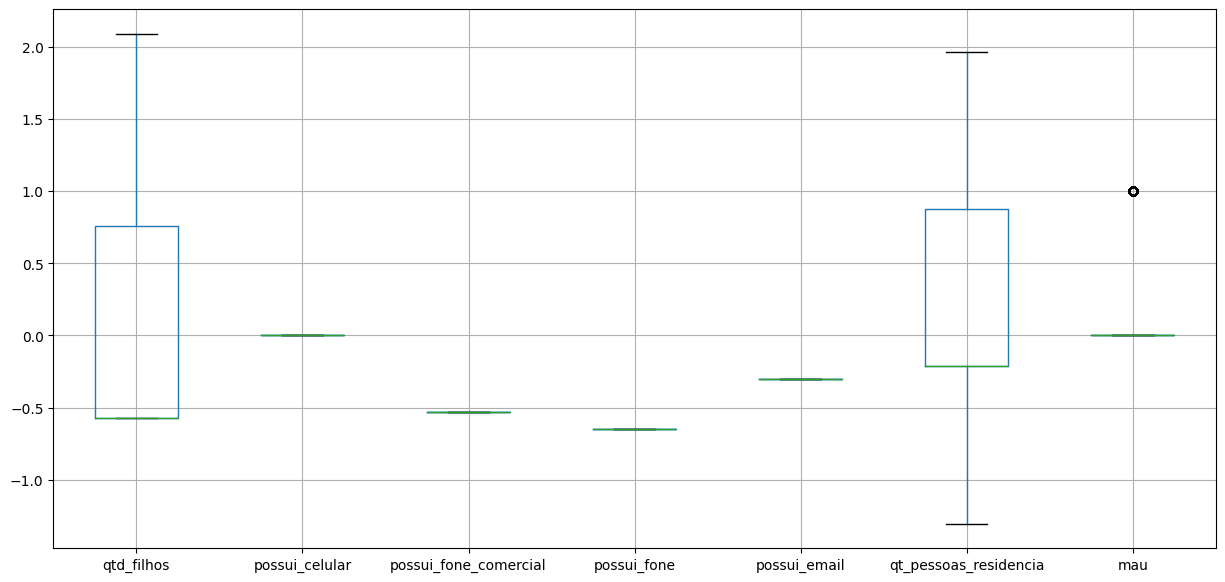

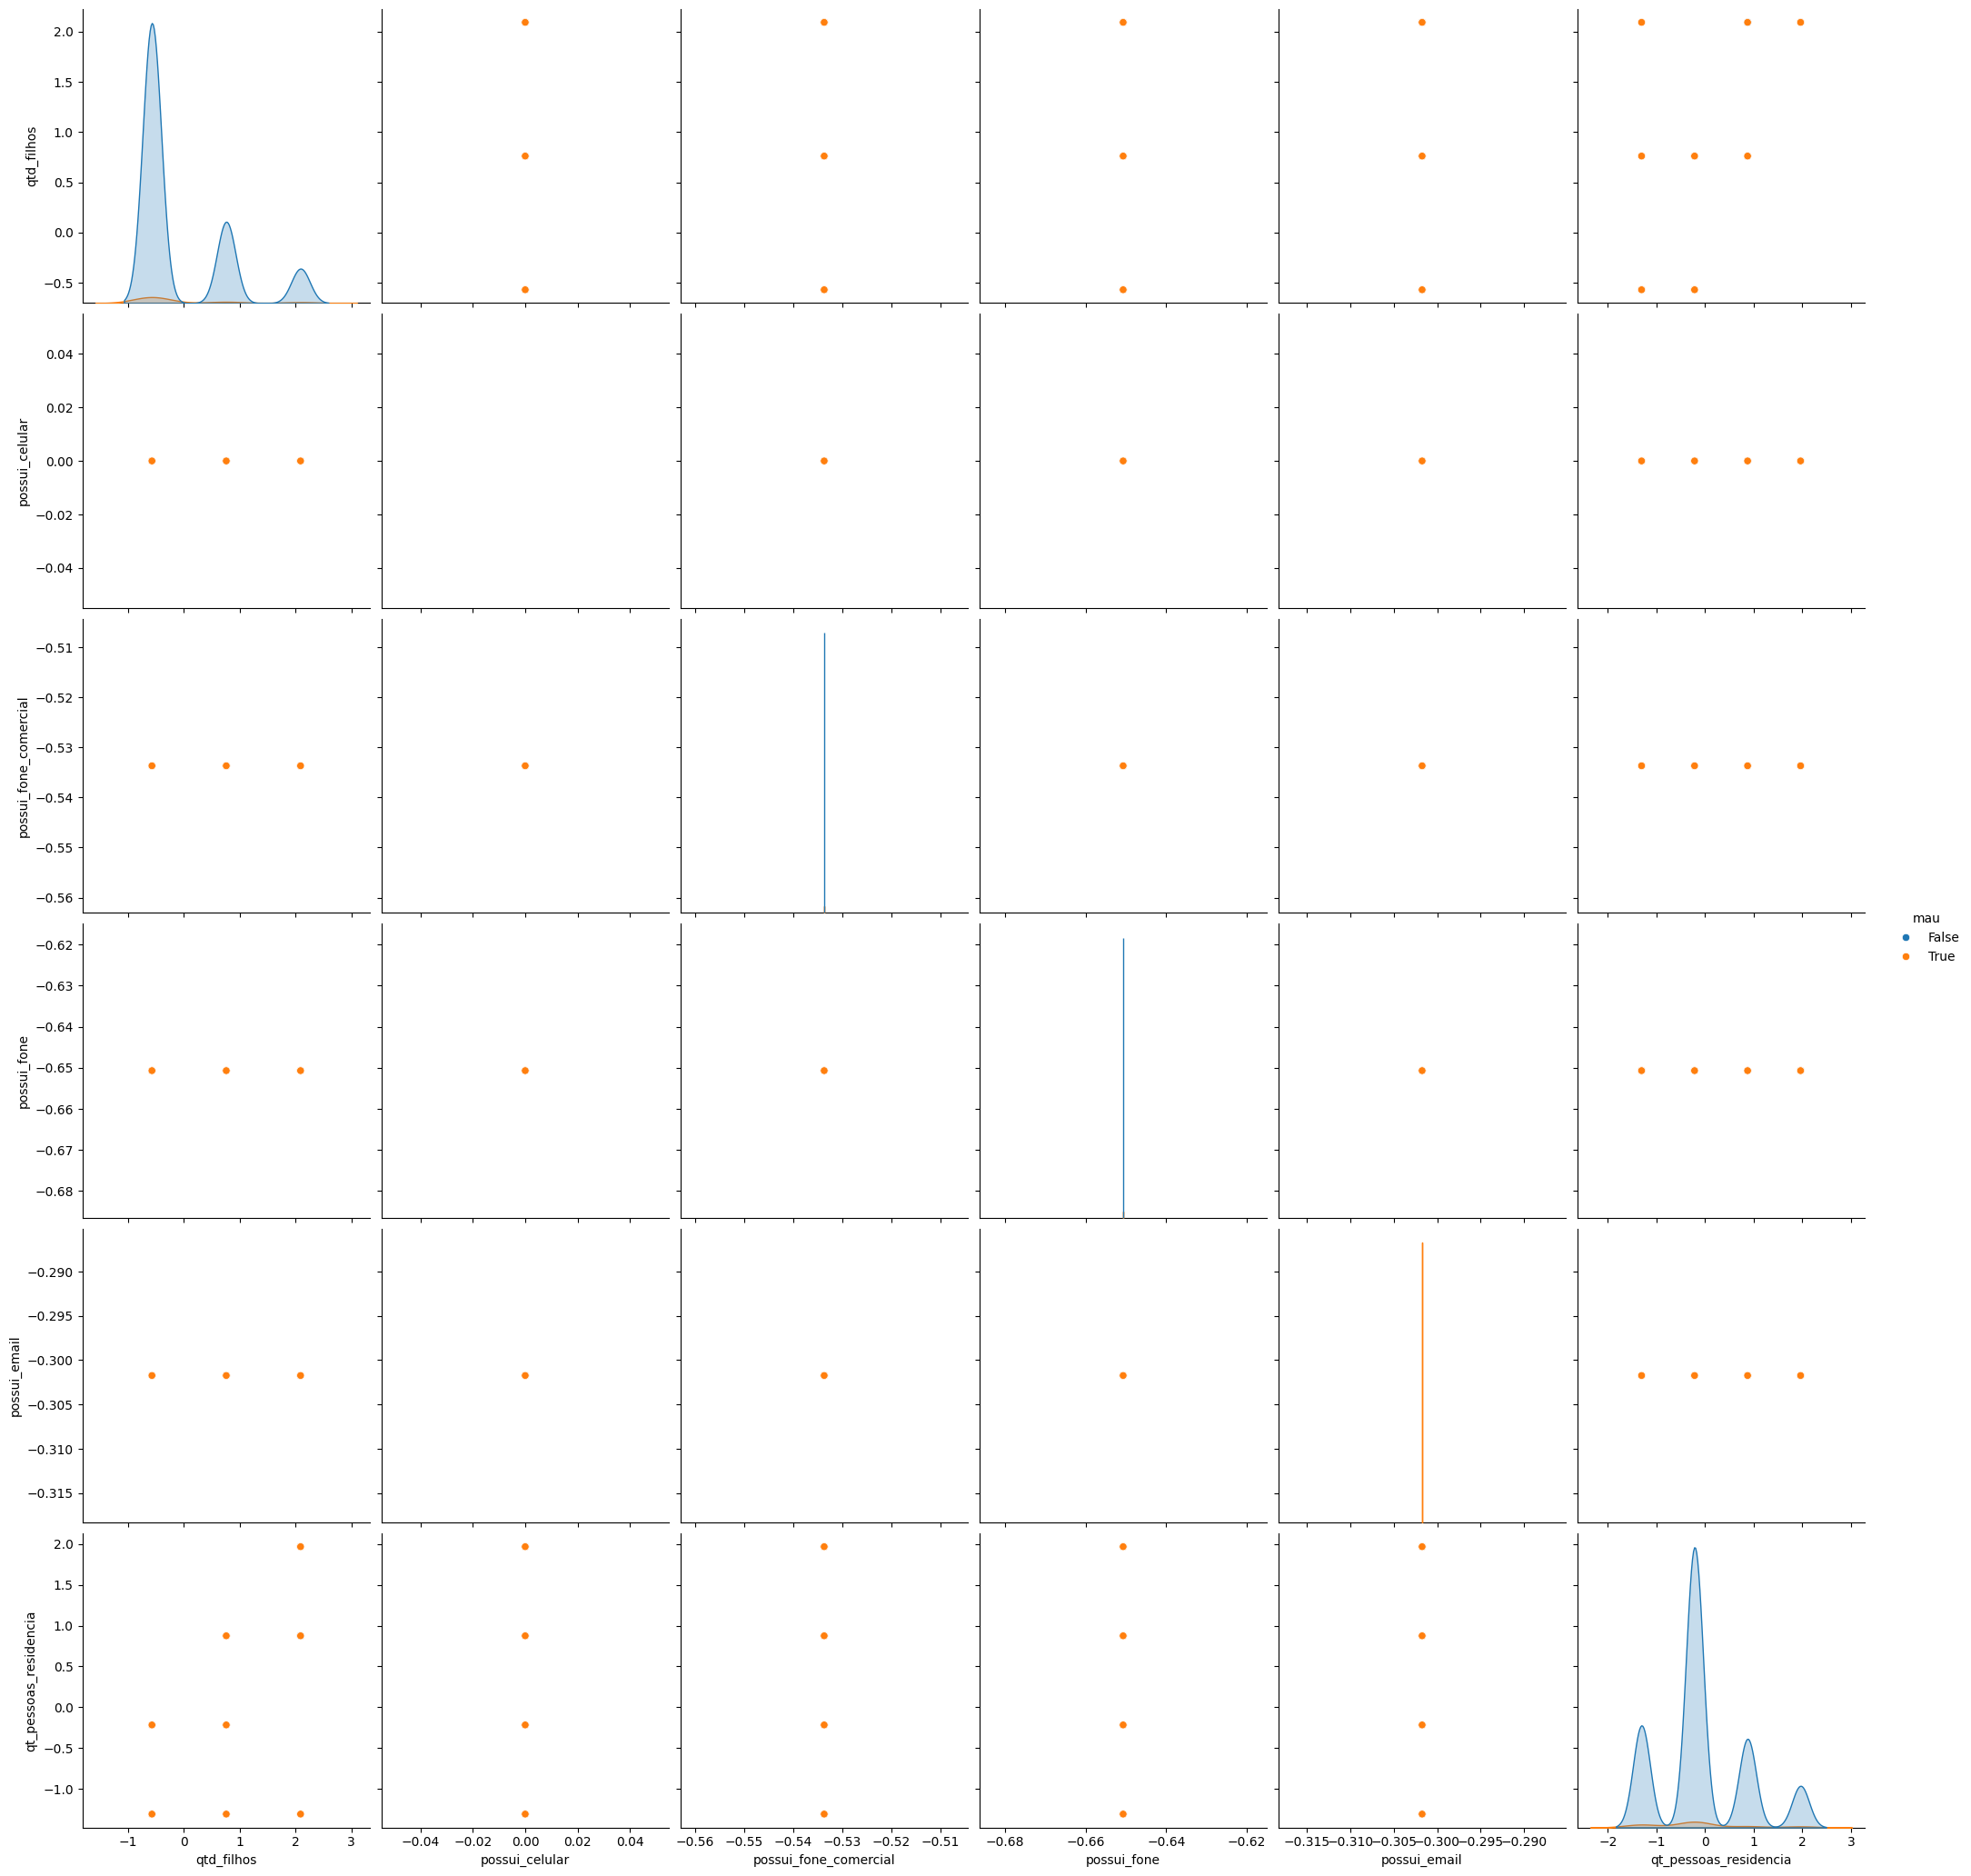

In [20]:
def removeOutliers(df):
    """
    Remove outliers usando IQR apenas das colunas numéricas.
    """

    df_clean = df.copy()

    # seleciona apenas colunas numéricas
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

    for atributo in numeric_cols:
        q75, q25 = np.percentile(df_clean[atributo], [75, 25])
        IQR = q75 - q25

        # limites
        lower = q25 - 1.5 * IQR
        upper = q75 + 1.5 * IQR

        # filtra
        df_clean = df_clean[(df_clean[atributo] >= lower) &
                            (df_clean[atributo] <= upper)]

    return df_clean

df = removeOutliers(df)

df.boxplot(figsize=(15,7))
plt.show()

sns.pairplot(df, hue='mau', height=3.5)
plt.show()


# Pré-processamento: Distribuição das classes

,count
mau,
False,3521
True,152


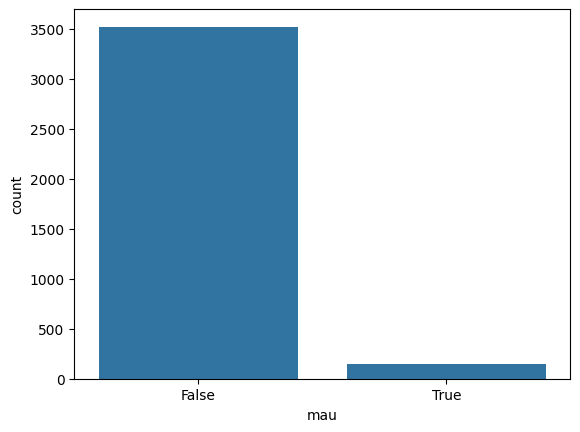

In [21]:
display(df['mau'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="mau", data=df)

# mostra o gráfico
plt.show()

# Pré-processamento: Correlação entre os atributos

In [22]:
# criando uma matriz X com os valores do data frame
numeric_df = df.select_dtypes(include=[np.number])

X = numeric_df.values

correlation = np.corrcoef(X, rowvar=False)

print('\n\nMatriz de correlação: ')
display(correlation)



Matriz de correlação: 


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[ 1.00000000e+00,             nan, -8.08992786e-17,
                    nan, -8.08992786e-17,  8.51491917e-01],
       [            nan,             nan,             nan,
                    nan,             nan,             nan],
       [-8.08992786e-17,             nan,  1.00000000e+00,
                    nan,  1.00000000e+00, -3.32973300e-17],
       [            nan,             nan,             nan,
                    nan,             nan,             nan],
       [-8.08992786e-17,             nan,  1.00000000e+00,
                    nan,  1.00000000e+00, -3.32973300e-17],
       [ 8.51491917e-01,             nan, -3.32973300e-17,
                    nan, -3.32973300e-17,  1.00000000e+00]])

In [23]:
df_values = df.drop(columns=['mau'])

# apenas colunas numéricas
df_numeric = df_values.select_dtypes(include=[np.number])

df_correlation = df_numeric.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)




Matriz de correlação: 


,qtd_filhos,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
qtd_filhos,1.000000,NaN,NaN,NaN,NaN,0.851492
possui_celular,NaN,NaN,NaN,NaN,NaN,NaN
possui_fone_comercial,NaN,NaN,NaN,NaN,NaN,NaN
possui_fone,NaN,NaN,NaN,NaN,NaN,NaN
possui_email,NaN,NaN,NaN,NaN,NaN,NaN
qt_pessoas_residencia,0.851492,NaN,NaN,NaN,NaN,1.000000


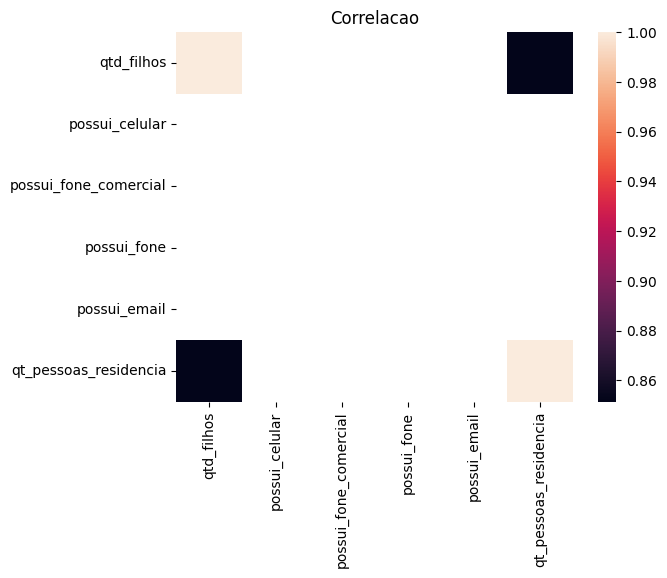

In [24]:
# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

In [ ]:
df.to_csv('trusted_dataset.csv', index=False)